
# **Construção Modelo Aprendizado de Máquina - Doglas**






**Carregamento das Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

from joblib import dump, load

**Carregamento do Arquivo (Dataset)**

In [ ]:
df = pd.read_csv("CSVTarefas.csv")
df.head()

,verbo_inicial,substantivo,categoria,subcategoria,horas
0,Adicionar,Auditoria,Operacional,Suporte Interno,0.70
1,Adicionar,Auditoria,Desenvolvimento,Aprimoramento,4.00
2,Adicionar,Botão,Desenvolvimento,Erro,1.00
3,Adicionar,Botão,Desenvolvimento,Aprimoramento,2.25
4,Adicionar,Botão,Desenvolvimento,Aprimoramento,2.62


In [ ]:
df.tail()

,verbo_inicial,substantivo,categoria,subcategoria,horas
1037,Verificar,Servidor,Operacional,Suporte Interno,2.5
1038,Verificar,Servidor,Operacional,Suporte Interno,2.5
1039,Verificar,Servidor,Operacional,Suporte Interno,2.5
1040,Verificar,Servidor,Operacional,Suporte Interno,2.5
1041,Verificar,Servidor,Operacional,Suporte Interno,2.5


**Preparação dos Dados**

Neste momento serão convertidas as variáveis descritivas para valores

In [ ]:
df['verbo_inicial'] = df['verbo_inicial'].apply(lambda x: 1 if x == 'Adicionar' 
                                                else 2 if x == 'Aprender'
                                                else 3 if x == 'Atualizar'
                                                else 4 if x == 'Automatizar'
                                                else 5 if x == 'Backup'
                                                else 6 if x == 'Configurar'
                                                else 7 if x == 'Converter'
                                                else 8 if x == 'Corrigir'
                                                else 9 if x == 'Criar'
                                                else 10 if x == 'Definir'
                                                else 11 if x == 'Escrever'
                                                else 12 if x == 'Instalar'
                                                else 13 if x == 'Investigar'
                                                else 14 if x == 'Melhorar'
                                                else 15 if x == 'Mesclar'
                                                else 16 if x == 'Migrar'
                                                else 17 if x == 'Obter'
                                                else 18 if x == 'Organizar'
                                                else 19 if x == 'Permitir'
                                                else 20 if x == 'Pesquisa'
                                                else 21 if x == 'Remover'
                                                else 22 if x == 'Reunião'
                                                else 23 if x == 'Semana'
                                                else 24 if x == 'Sincronizar'
                                                else 25 if x == 'Suporte'
                                                else 26 if x == 'Testar'
                                                else 27 if x == 'Treinamento'
                                                else 28 if x == 'Validar'
                                                else 29)

In [ ]:
df['verbo_inicial'].value_counts()

25    148
22    130
8      87
29     83
1      79
3      72
9      66
13     56
26     52
6      36
18     28
17     22
19     21
14     18
24     17
12     16
5      15
21     15
11     14
23     11
15     11
7       9
16      8
20      7
28      5
2       5
10      4
27      4
4       3
Name: verbo_inicial, dtype: int64

In [ ]:
df['categoria'] = df['categoria'].apply(lambda x: 1 if x == 'Desenvolvimento' 
                                        else 2 if x == 'Gestão' 
                                        else 3)

In [ ]:
df['categoria'].value_counts()

1    621
3    283
2    138
Name: categoria, dtype: int64

In [ ]:
df['subcategoria']=df['subcategoria'].apply(lambda x: 1 if x == 'Aprimoramento' 
                                        else 2 if x == 'Consultoria' 
                                        else 3 if x == 'Documentação'
                                        else 4 if x == 'Erro'
                                        else 5 if x == 'Lançamento'
                                        else 6 if x == 'Marketing'
                                        else 7 if x == 'Reunião de Gestão'
                                        else 8 if x == 'Reunião de progresso'
                                        else 9 if x == 'Suporte ao Cliente'
                                        else 10 if x == 'Suporte Interno'
                                        else 11 if x == 'Teste'
                                        else 12)

In [ ]:
df['subcategoria'].value_counts()

1     271
10    253
4     138
9     101
6      61
7      46
5      45
12     37
11     34
8      23
3      18
2      15
Name: subcategoria, dtype: int64

In [ ]:
df['verbo_inicial'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
df['categoria'].unique()

array([3, 1, 2])

In [ ]:
df['subcategoria'].unique()

array([10,  1,  4,  5,  9,  6,  2, 12,  3, 11,  7,  8])

**Tratamento do Substantivo**


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X = df[['substantivo']]
enc.fit(X)
OrdinalEncoder()
df[['substantivo']] = enc.transform(df[['substantivo']])

In [ ]:
df['substantivo'].unique()

array([ 12.,  15.,  22.,  24.,  25.,  26.,  30.,  31.,  44.,  49.,  52.,
        57.,  58.,  62.,  66.,  68.,  71.,  75.,  81.,  84.,  88.,  89.,
        90.,  91., 102., 103., 105., 107., 111., 115., 118., 123., 124.,
       125., 129., 130., 136., 143., 145., 148., 149., 157., 161., 163.,
       168., 169., 171., 172., 175., 179., 180., 181., 182., 188., 190.,
       195., 196.,  17.,  18.,  55.,   0.,  14.,  47.,  28.,  29.,  32.,
        36.,  41.,  42.,  45.,  51.,  76.,  77.,  85.,  87., 101., 110.,
       116., 121., 122., 137., 139., 166., 173., 174., 176., 187., 193.,
       197., 147.,  61., 100.,   4.,   9.,  13.,  48., 184.,  93., 113.,
       126.,   1.,  10.,  21.,  33.,  38.,  39.,  40.,  43.,  50.,  59.,
        64.,  65.,  72., 104., 106., 128., 159., 160., 178., 183., 191.,
       194.,   7.,  37.,  19.,  70.,  80.,  83.,  94., 108., 117., 119.,
       142., 131., 132., 133., 134., 138., 151., 158., 189.,  69.,   3.,
       177.,  60.,  73., 135.,  34.,  53.,  56.,  7

In [ ]:
df.head()

,verbo_inicial,substantivo,categoria,subcategoria,horas
0,1,12.0,3,10,0.70
1,1,12.0,1,1,4.00
2,1,15.0,1,4,1.00
3,1,15.0,1,1,2.25
4,1,15.0,1,1,2.62


In [ ]:
df.tail()

,verbo_inicial,substantivo,categoria,subcategoria,horas
1037,29,166.0,3,10,2.5
1038,29,166.0,3,10,2.5
1039,29,166.0,3,10,2.5
1040,29,166.0,3,10,2.5
1041,29,166.0,3,10,2.5


**Codificar variável alvo**

Optou-se por seguir a base da sequência de Fibonacci (Fibonacci Modificado), usando tais valores para classificações em horas: 1/2, 1, 2, 3, 5, 8, 13, 20, 40 e 100. Esta classificação é usada em diversas ferramentas manuais ou digitais para utilização do Planning Poker.
(https://planningpokeronline.com/)

A função abaixo converte a variável alvo para sua categoria correspondente. Obs: A categoria 0, refere-se à estimativa 1/2. As demais categorias são as próprias cargas horárias.

In [ ]:
def categorizaTarget(s):
    if s <= 1.5:
       return int(0)
    elif s > 1.5 and s <= 4.5:
       return int(1)
    elif s > 4.5 and s <= 9.5:
       return int(2)
    elif s > 9.5:
       return int(3)

In [ ]:
df['horas'] = df['horas'].apply(categorizaTarget)

In [ ]:
df.head()

,verbo_inicial,substantivo,categoria,subcategoria,horas
0,1,12.0,3,10,0
1,1,12.0,1,1,1
2,1,15.0,1,4,0
3,1,15.0,1,1,1
4,1,15.0,1,1,1


In [ ]:
df['horas'].unique()

array([0, 1, 2, 3])

In [ ]:
df['horas'].value_counts()

1    369
0    367
2    177
3    129
Name: horas, dtype: int64

**Resumo dos dados**

In [ ]:
df.describe()

,verbo_inicial,substantivo,categoria,subcategoria,horas
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,15.911708,117.780230,1.675624,6.008637,1.065259
std,9.150565,58.774424,0.873542,3.802386,1.006970
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,8.000000,65.000000,1.000000,1.000000,0.000000
50%,17.500000,127.000000,1.000000,6.000000,1.000000
75%,25.000000,166.000000,3.000000,10.000000,2.000000
max,29.000000,197.000000,3.000000,12.000000,3.000000


**Visualização dos Dados**

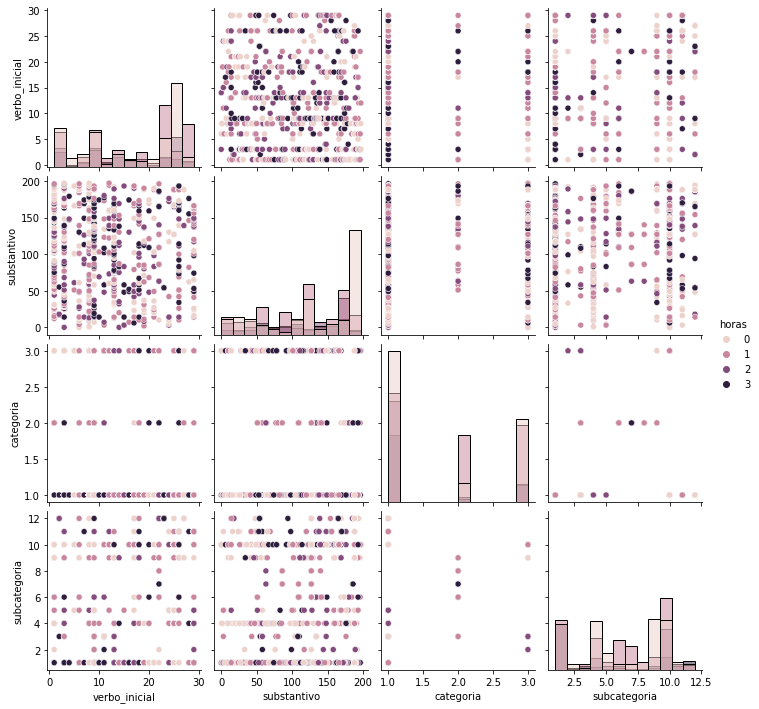

In [ ]:
sns.pairplot(df, hue="horas", diag_kind='hist')

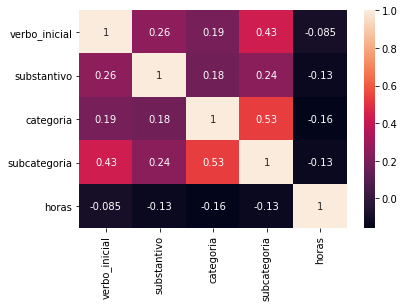

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Selecionar Algoritmos e Criar Modelos, avaliando sua eficiência**

In [ ]:
y = df[['horas']] # variável alvo (target) 
X = df.iloc[:, 0:4] # variáveis descritivas (features)
X.head()

,verbo_inicial,substantivo,categoria,subcategoria
0,1,12.0,3,10
1,1,12.0,1,1
2,1,15.0,1,4
3,1,15.0,1,1
4,1,15.0,1,1


Separação dos dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
np.shape(y_train)

(729, 1)

**Modelos Baseados em Informação (Criação de uma Árvore de Decisão)**

In [ ]:
#Chamando a função da Árvore de Decisão
dectree = tree.DecisionTreeClassifier()

In [ ]:
dectree.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = dectree.predict(X_test.iloc[0:10])

In [ ]:
print(pred)

[0 2 3 1 0 0 1 0 3 2]


In [ ]:
y_test[0:10]

,horas
884,0
135,2
377,2
944,0
297,0
946,1
591,0
60,0
158,3
774,2


In [ ]:
dectree.score(X_test, y_test)

0.5431309904153354

In [ ]:
previsoesdectree = dectree.predict(X_test[['verbo_inicial', 'substantivo', 'categoria', 'subcategoria']])

In [ ]:
alvosdectree = df['horas']

In [ ]:
confusion_matrix(y_test, previsoesdectree)

array([[69, 28,  8,  5],
       [28, 61, 14,  8],
       [ 7, 12, 25,  9],
       [ 8,  7,  9, 15]])

In [ ]:
print(classification_report(y_test, previsoesdectree))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       110
           1       0.56      0.55      0.56       111
           2       0.45      0.47      0.46        53
           3       0.41      0.38      0.39        39

    accuracy                           0.54       313
   macro avg       0.51      0.51      0.51       313
weighted avg       0.54      0.54      0.54       313



**Modelos Baseados em Similaridade (KNN)**

In [ ]:
#Chamando a função do KNN
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test.iloc[0:10])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 2])

In [ ]:
y_test[0:10]

,horas
884,0
135,2
377,2
944,0
297,0
946,1
591,0
60,0
158,3
774,2


In [ ]:
knn.score(X_test, y_test)

0.5143769968051118

In [ ]:
previsoesknn = knn.predict(X_test[['verbo_inicial', 'substantivo', 'categoria', 'subcategoria']])

In [ ]:
alvosknn = df['horas']

In [ ]:
confusion_matrix(y_test, previsoesknn)

array([[80, 22,  4,  4],
       [35, 57, 15,  4],
       [15, 14, 20,  4],
       [17, 13,  5,  4]])

In [ ]:
print(classification_report(y_test, previsoesknn))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62       110
           1       0.54      0.51      0.53       111
           2       0.45      0.38      0.41        53
           3       0.25      0.10      0.15        39

    accuracy                           0.51       313
   macro avg       0.45      0.43      0.43       313
weighted avg       0.49      0.51      0.49       313



**Modelos Baseados em Probabilidade (Naive Bayes)**

In [ ]:
#Chamando a função de Naive Bayes
naiveb = GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naiveb.fit(X_train, np.ravel(y_train))

In [ ]:
naiveb.predict(X_test.iloc[0:10])

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test[0:10]

,horas
884,0
135,2
377,2
944,0
297,0
946,1
591,0
60,0
158,3
774,2


In [ ]:
naiveb.score(X_test, y_test)

0.4217252396166134

In [ ]:
previsoesnaiveb = naiveb.predict(X_test[['verbo_inicial', 'substantivo', 'categoria', 'subcategoria']])

In [ ]:
alvosnaiveb = df['horas']

In [ ]:
confusion_matrix(y_test, previsoesnaiveb)

array([[52, 37, 16,  5],
       [25, 65, 16,  5],
       [25,  8, 11,  9],
       [11, 17,  7,  4]])

In [ ]:
print(classification_report(y_test, previsoesnaiveb))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47       110
           1       0.51      0.59      0.55       111
           2       0.22      0.21      0.21        53
           3       0.17      0.10      0.13        39

    accuracy                           0.42       313
   macro avg       0.34      0.34      0.34       313
weighted avg       0.40      0.42      0.41       313



**Uso do XGBoost**

In [ ]:
#Chamando a função do XGBoost
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.predict(X_test.iloc[0:10])

array([0, 2, 1, 0, 0, 0, 0, 0, 3, 2])

In [ ]:
y_test[0:10]

,horas
884,0
135,2
377,2
944,0
297,0
946,1
591,0
60,0
158,3
774,2


In [ ]:
xgb.score(X_test, y_test)

0.5335463258785943

In [ ]:
previsoesxgb = xgb.predict(X_test[['verbo_inicial', 'substantivo', 'categoria', 'subcategoria']])

In [ ]:
alvosxgb = df['horas']

In [ ]:
confusion_matrix(y_test, previsoesxgb)

array([[69, 31,  6,  4],
       [33, 64,  6,  8],
       [ 6, 16, 21, 10],
       [ 5, 16,  5, 13]])

In [ ]:
print(classification_report(y_test, previsoesxgb))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       110
           1       0.50      0.58      0.54       111
           2       0.55      0.40      0.46        53
           3       0.37      0.33      0.35        39

    accuracy                           0.53       313
   macro avg       0.51      0.48      0.49       313
weighted avg       0.53      0.53      0.53       313



In [ ]:
dump(dectree, 'tasks_classifier.pkl')

['tasks_classifier.pkl']

In [ ]:
model = load('tasks_classifier.pkl')